# Wavefront Calculation Strategy Comparison

When analyzing optical systems, the computed wavefront error depends on how the reference sphere is defined. Different strategies remove different components of aberration (tilt, defocus), which changes the reported RMS wavefront error.  

Below are common reference sphere definitions:

- **Chief ray sphere**:  
  The reference sphere is centered at the intersection of the chief ray with the image plane and passes through the paraxial exit pupil location.  
  *Interpretation*: Preserves system focus and tilt, so the resulting wavefront error includes both tilt and defocus contributions.

- **Centroid sphere**:  
  The reference sphere is centered at the centroid of the image-plane irradiance distribution. A best-fit sphere is then computed to the wavefront points around this center.  
  *Interpretation*: Removes tilt but retains defocus, giving a more balanced error measure than the chief ray method.

- **Best-fit sphere**:  
  The reference sphere is obtained by fitting a sphere directly to the wavefront points in a least-squares sense.  
  *Interpretation*: Removes both tilt and defocus, reporting only the higher-order aberrations. This often gives the lowest RMS wavefront error.

### RMS Wavefront Error Comparison

The RMS wavefront error depends on how the reference sphere is defined. A common trend is:

**chief ray ≥ centroid ≥ best-fit sphere**

This ordering arises because the centroid approach removes tilt and the best-fit approach removes both tilt and defocus. However, the exact values also depend on factors such as pupil obscurations, weighting schemes, sampling density, etc. These can shift the relative magnitudes, so the inequality is typical but not guaranteed.


In [1]:
import matplotlib.pyplot as plt
from optiland.samples.objectives import DoubleGauss
from optiland.wavefront import OPD

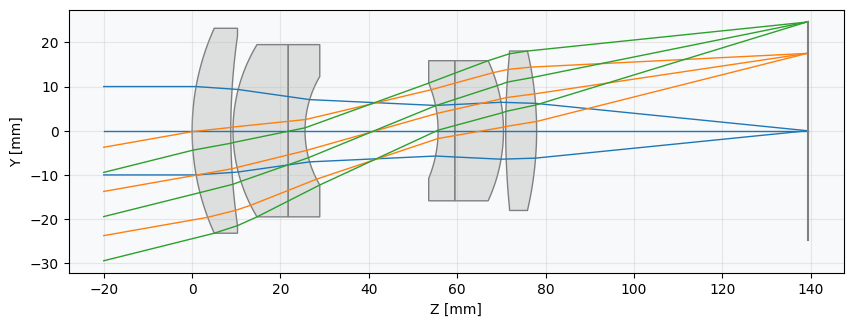

In [2]:
lens = DoubleGauss()
_ = lens.draw()

Strategy: chief_ray, RMS: 0.6326 waves


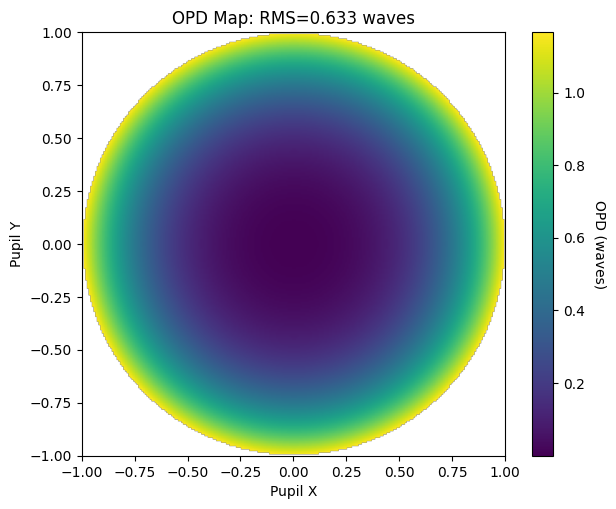

Strategy: centroid_sphere, RMS: 0.3849 waves


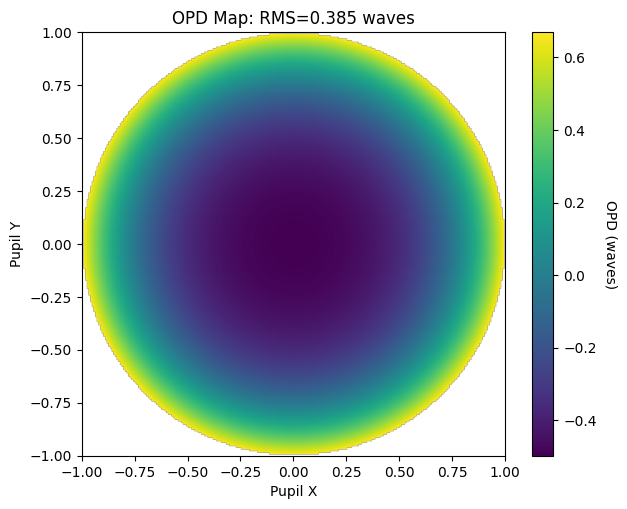

Strategy: best_fit_sphere, RMS: 0.0671 waves


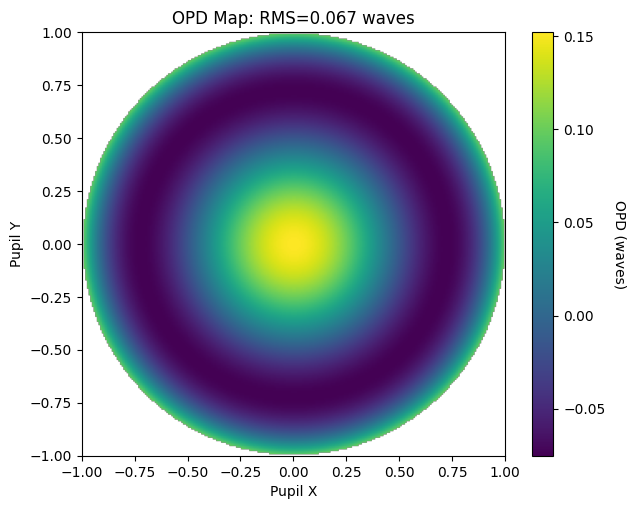

In [3]:
for strategy in ["chief_ray", "centroid_sphere", "best_fit_sphere"]:
    opd = OPD(lens, field=(0, 0), wavelength=0.55, strategy=strategy)
    print(f"Strategy: {strategy}, RMS: {opd.rms():.4f} waves")
    _ = opd.view()
    plt.show()  # call show to immediately display the figure